# Project on Investigating Dataset

## Introduction

The dataset to be investigated was gotten from The Movie Database (TMDb), and it contains 10,000 movie records with 
imformation such as director, budget, title and realease data.

## Questions

<b>In my findings, I'd like the answer some questions to draw my conclusions</b>
<li><a href='#revenue'>What movie has the hightest and lowest revenue?</a></li>
<li><a href='#budget'>Movie with the highest/lowest budget.</a></li>
<li><a href='#year'>What year has the highest movies release?</a></li>
<li><a href='#corr'>Correlation between variables/features</a></li>

In [41]:
# notebook imports

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import numpy as np

## Getting data and inspection

In [42]:
# get data set

df = pd.read_csv('data/tmdb-movies.csv')

In [43]:
# View few colums of dataset

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [44]:
# get insight on data, like missing values, dtype for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# this table describes the data with different metrics like mean, standard deviation, min and max values for each column

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# get the shape of dataframe (row*col)

df.shape

(10866, 21)

In [9]:
# see colums with null/missing values

df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [45]:
# fill in missing values with mean value from that column

df.fillna(value=df.mean, inplace=True)

# just to be sure all values are filled.
df.isnull().any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

## Data Exploration

<div id='revenue'><h3>Movies with highest/lowest Revenue</h3></div>

In [47]:
# a simple function to help

def high_or_low(attribute, ascend):
    dataframe = pd.DataFrame(df[attribute].sort_values(ascending = ascend))
    dataframe['movie_title'] = df['original_title']
    movies = list(map(str,(dataframe['movie_title'])))
    
    return list(dataframe[attribute][:10]), list(movies[:10])

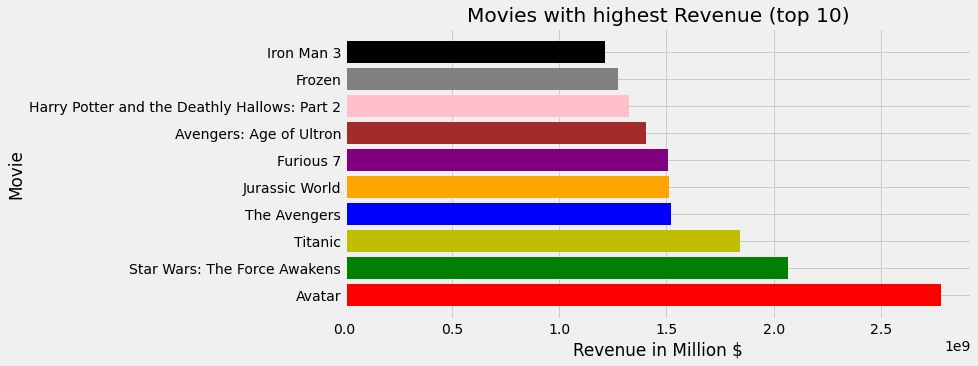

In [51]:
# What movie has the hightest revenue?
revenue, movies = high_or_low('revenue', False)

colours = ['r', 'g', 'y', 'b', 'orange', 'purple', 'brown', 'pink', 'gray', 'k']
plt.figure(figsize=(10, 5))
plt.barh(movies, revenue, color=colours)
plt.title("Movies with highest Revenue (top 10)")
plt.ylabel('Movie')
plt.xlabel("Revenue in Million $")
plt.show()

From the horizontal plot, we can see that Avatar has the highest revenue, followed by Star wars, etc

In [52]:
# What movie has the lowest revenue?
revenue, low_movies = high_or_low('revenue', True)

print('Movies with lowest revenue (lowest 10)\n')
for x, movie in enumerate(low_movies):
    print(x, movie)

Movies with lowest revenue (lowest 10)

0 Manos: The Hands of Fate
1 A Turtleâ€™s Tale 2: Sammyâ€™s Escape From Paradise
2 Truth or Dare
3 Laurence Anyways
4 Io e te
5 Much Ado About Nothing
6 London 2012 Olympic Opening Ceremony: Isles of Wonder
7 Radio Rebel
8 So Undercover
9 Maximum Conviction


<div id='budget'><h3>Movies with highest/lowest Budget</h3></div>

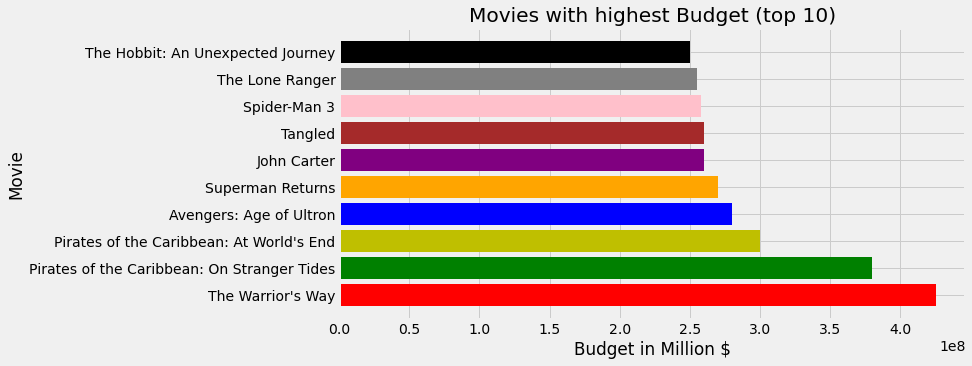

In [54]:
# What movie has the hightest budget?

budget, movies = high_or_low('budget', False)

colours = ['r', 'g', 'y', 'b', 'orange', 'purple', 'brown', 'pink', 'gray', 'k']
plt.figure(figsize=(10, 5))
plt.barh(movies, budget, color=colours)
plt.title("Movies with highest Budget (top 10)")
plt.ylabel('Movie')
plt.xlabel("Budget in Million $")
plt.show()

The warriors came first as the highest followed by Pirates of the Caribbean as the movies with highest budget

In [55]:
# What movie has the hightest budget?

budget, low_budget_movies = high_or_low('budget', True)

print('Movies with lowest Budget (lowest 10)\n')
for x, movie in enumerate(low_budget_movies):
    print(x, movie)

Movies with lowest Budget (lowest 10)

0 The Butcher Boy
1 Muscle Shoals
2 Lego Batman: The Movie - DC Super Heroes Unite
3 We Steal Secrets: The Story of WikiLeaks
4 Get a Horse!
5 SAGA - Curse of the Shadow
6 Chariot
7 The Bell Witch Haunting
8 Dragonfyre
9 Hellbenders


<div id='year'><h3>What year has the highest movies release?</h3></div>

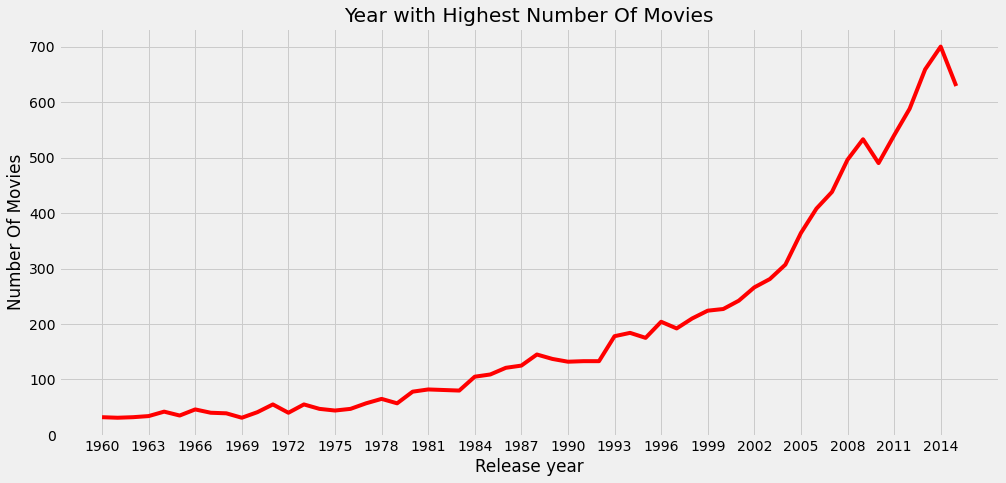

In [19]:
movie_year = df.groupby('release_year').count()['id']

plt.figure(figsize=(15, 7))
plt.plot(movie_year, c='r')
plt.title("Year with Highest Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
plt.xticks(np.arange(1960,2016,3))
plt.show()

From the above line plot, we can see that 2014 has the highest number of movie release

<div id='corr'><h3>Correlation between variables/features</h3></div>

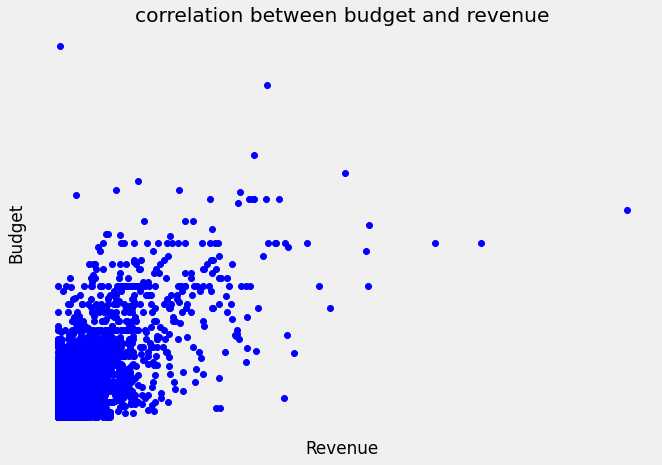

In [36]:
# now let's find some correlation between features

plt.figure(figsize=(10, 7))
# plt.plot(df['budget'],df['revenue'], 'ro', lw=2,)
plt.plot(df['revenue'], df['budget'], 'bo')
plt.title("correlation between budget and revenue")
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.xticks([])
plt.yticks([])
plt.show()

There is a positive correlation between budget and revenue, a higher budget tends to yield high revenue

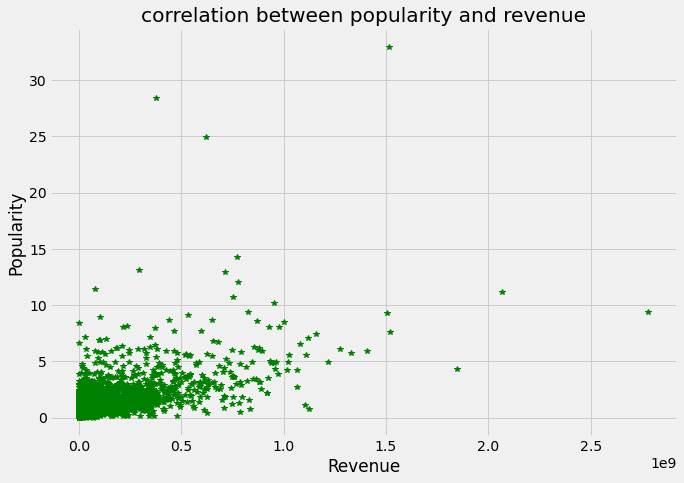

In [38]:
# correlation between popularity and revenue

plt.figure(figsize=(10, 7))
plt.plot(df['revenue'], df['popularity'], 'g*')
plt.title("correlation between popularity and revenue")
plt.xlabel('Revenue')
plt.ylabel('Popularity')

plt.show()

There is also a positive correlation between revenue and movie popularity. the more popular the movie, the higher the revenue

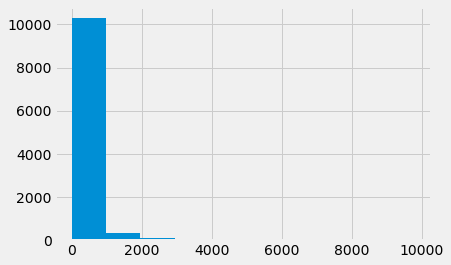

In [62]:
plt.hist(df['vote_count'], bins=10)
plt.show()

A single variable plot for vote shows that the highest votes are with around 10,000 votes

## Conclusions

from my little findings, I was able to get some information from the movie data:
<li>Avatar has the highest revenue/profit</li>
<li>Yhe warriors came first as the highest budget</li>
<li>2014 has the highest number of movie release</li>
<li>and there seems to be a positive correlation between budget and profit, higher budget is likely to yield higher profit</li>